# Plotting impedance spectra

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from impedance.circuits import CustomCircuit

In [2]:
# read data
data = np.genfromtxt('../../../data/exampleData.csv', delimiter=',')

frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]

frequencies = frequencies[np.imag(Z) < 0]
Z = Z[np.imag(Z) < 0]

In [3]:
circuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200], circuit='R_0-p(R_1,C_1)-p(R_1,C_1)-W_1/W_2')

circuit.fit(frequencies, Z)

print(circuit)


-------------------------------
Circuit: None
Circuit string: R_0-p(R_1,C_1)-p(R_1,C_1)-W_1/W_2
Algorithm: leastsq
Fit: True
Fit parameters:
	R_0 = 1.65e-02
	R_1 = 8.77e-03
	C_1 = 3.28e+00
	R_1 = 5.31e-03
	C_1 = 2.32e-01
	W_1 = 6.37e-02
	W_2 = 2.38e+02

-------------------------------



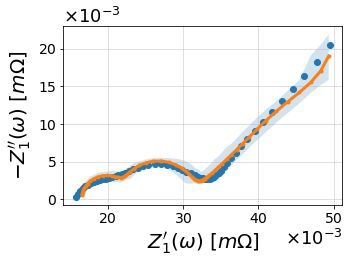

In [4]:
# plot the data and the fit
circuit.plot(frequencies, Z, CI=True)